In [122]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

# Introducción al (EDA) - `miscelaneos`

Este análisis exploratorio se centra en la tabla `miscelaneos`, que almacena detalles claves de cada negocio. Nuestro objetivo principal es comprender la accesibilidad de cada negocio ya que es un KPI definido. Pero tambien observar todas las categorias, relaciones y porcentajes de la tabla.

In [123]:
# Leer Archivo
misc = pd.read_parquet(r'C:\Users\mauri\OneDrive\Escritorio\proyectogrupal\data\g_misc_v4.parquet', engine='pyarrow')
misc.head()

,id_negocio,categoria_atributo,atributo
0,0x89c2f6163ac2864f:0xa4213a2f66c15d8f,Accessibility,Wheelchair accessible entrance
1,0x864c1f10c079a921:0x95710cd26231cc3,Accessibility,Wheelchair accessible entrance
2,0x88d9050582e1e64b:0x33457ba08c64df20,Service options,Online appointments
3,0x80c2b7bb7415c183:0x3d3b0d5bc46d3b06,Accessibility,Wheelchair accessible entrance
4,0x80c2b7bb7415c183:0x3d3b0d5bc46d3b06,Planning,Quick visit


Conteo de nulos

In [124]:
nulos_por_columna = misc.isnull().sum()
nulos_por_columna

id_negocio            0
categoria_atributo    0
atributo              0
dtype: int64

analizar las frecuencias por categorias.

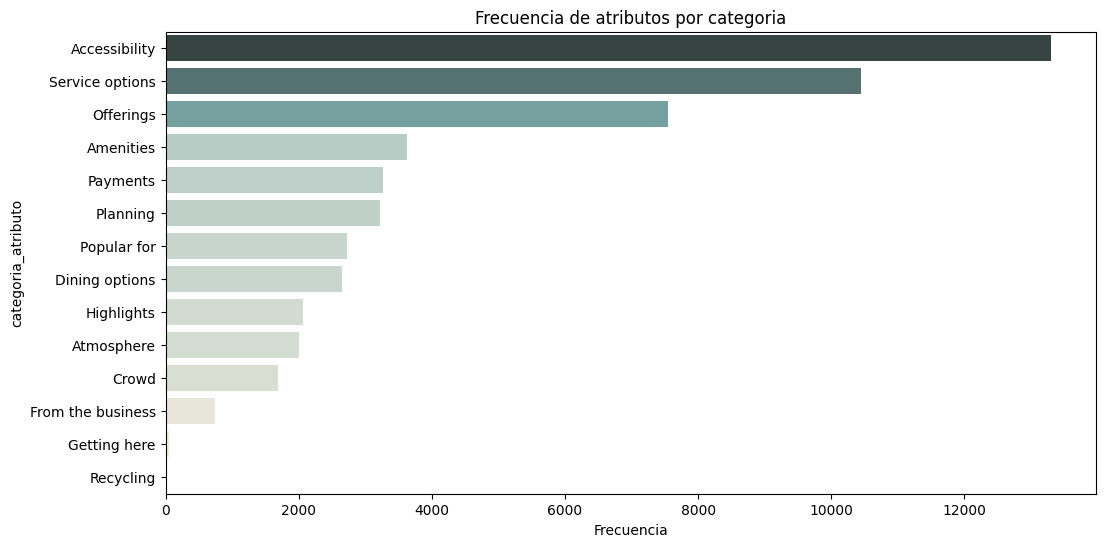

In [125]:
frecuencia = misc['categoria_atributo'].value_counts().reset_index() # Contar las categorias
frecuencia.columns = ['categoria_atributo', 'frecuencia'] # Ponerlo como columna.
frecuencia = frecuencia.sort_values(by='frecuencia', ascending=False)

# Crear la paleta de colores con los colores de la empresa en degrade
custom_cmap = LinearSegmentedColormap.from_list("custom_gradient", ['#f8efd9', '#79b4b7', '#344643'])
# Generar una lista de colores para cada barra en función de la frecuencia
color_list = [custom_cmap(value / frecuencia['frecuencia'].max()) for value in frecuencia['frecuencia']]

# Crear el gráfico de barras horizontales
plt.figure(figsize=(12, 6))
sns.barplot(x='frecuencia', y='categoria_atributo', data=frecuencia, hue='categoria_atributo', palette=color_list)
plt.xlabel('Frecuencia')
plt.title('Frecuencia de atributos por categoria')
plt.show()

### Elegir la accesibilidad como KPI es una decision correcta ya que es la mayor frecuencia de datos para analizar

Veamos ahora la distribucion dentro de accesibilidad

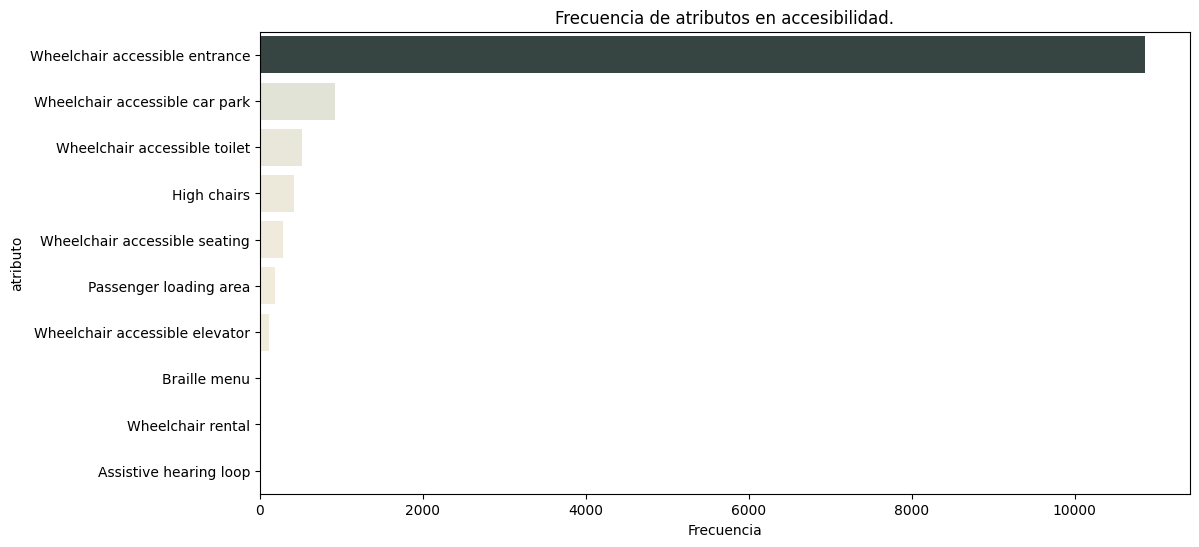

In [126]:
accessibility_df = misc[misc['categoria_atributo'] == 'Accessibility']
accessibility = accessibility_df['atributo'].value_counts().reset_index() # Contar atributos
accessibility.columns = ['atributo', 'frecuencia'] # Ponerlo como columna.
accessibility = accessibility.sort_values(by='frecuencia', ascending=False)

# Crear la paleta de colores con los colores de la empresa en degrade
custom_cmap = LinearSegmentedColormap.from_list("custom_gradient", ['#f8efd9', '#79b4b7', '#344643'])
# Generar una lista de colores para cada barra en función de la frecuencia
color_list = [custom_cmap(value / accessibility['frecuencia'].max()) for value in accessibility['frecuencia']]

# Crear el gráfico de barras horizontales
plt.figure(figsize=(12, 6))
sns.barplot(x='frecuencia', y='atributo', data=accessibility, hue='atributo', palette=color_list)
plt.xlabel('Frecuencia')
plt.title('Frecuencia de atributos en accesibilidad.')
plt.show()

### mas del 80% se refiere a la entrada con accesibilidad, dejando atras todas las demas opciones, eso es bueno ya que hay muchas opciones de mejora en los negocios.

veamos la frecuencia de accesibilidad en los estados.

In [127]:
# Traer los estados
estados = pd.read_parquet(r'C:\Users\mauri\OneDrive\Escritorio\proyectogrupal\data\g_address_v3.parquet', engine='pyarrow')
# Copia para mostrar solo los atributos de accesibilidad
accessibility_df = accessibility_df.merge(estados[['id_negocio', 'estado']], on='id_negocio', how='left')

# Copia para mostrar todos los atributos
misc_copia = misc.copy()
misc_copia = misc_copia.merge(estados[['id_negocio', 'estado']], on='id_negocio', how='left')


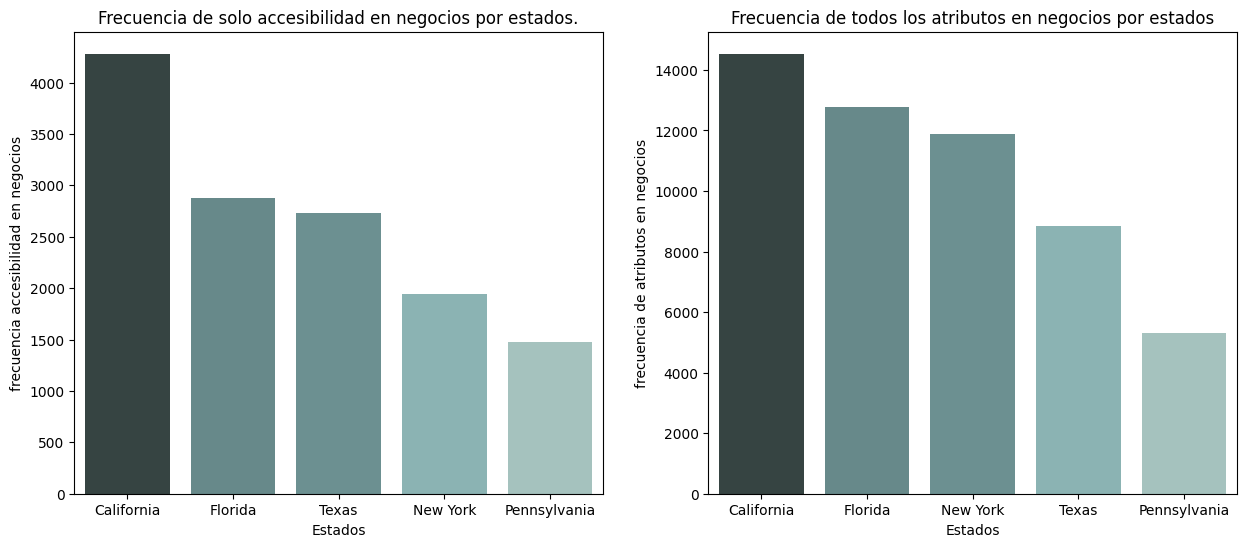

In [128]:
# Contar la frecuencia de id_estado en misc_copia
estado_counts_1 = misc_copia['estado'].value_counts().reset_index()
estado_counts_1.columns = ['estado', 'frecuencia']

# Contar la frecuencia de id_estado en accessibility_df
estado_counts = accessibility_df['estado'].value_counts().reset_index()
estado_counts.columns = ['estado', 'frecuencia']

# Crear la paleta de colores con los colores de la empresa en degrade
custom_cmap = LinearSegmentedColormap.from_list("custom_gradient", ['#f8efd9', '#79b4b7', '#344643'])
# Generar una lista de colores para cada barra en función de la frecuencia
color_list = [custom_cmap(value / estado_counts['frecuencia'].max()) for value in estado_counts['frecuencia']]

# Crear el gráfico de barras horizontales
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Grafico de accesibilidad
sns.barplot(x='estado', y='frecuencia', data=estado_counts, hue='estado', palette=color_list, ax=ax[0])
ax[0].set_xlabel('Estados')
ax[0].set_ylabel('frecuencia accesibilidad en negocios')
ax[0].set_title('Frecuencia de solo accesibilidad en negocios por estados.')

# Grafico de todos los atributos
sns.barplot(x='estado', y='frecuencia', data=estado_counts_1, hue='estado', palette=color_list, ax=ax[1])
ax[1].set_xlabel('Estados')
ax[1].set_ylabel('frecuencia de atributos en negocios')
ax[1].set_title('Frecuencia de todos los atributos en negocios por estados')

plt.show()

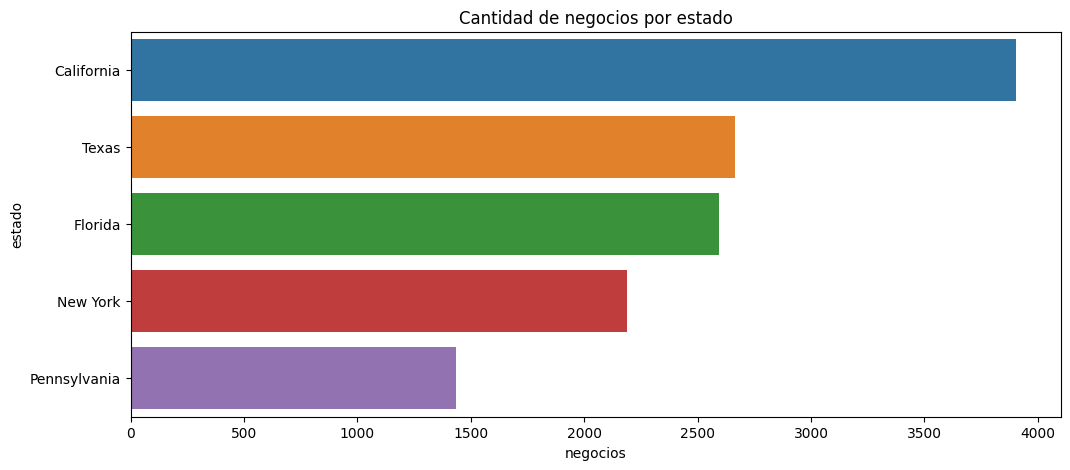

In [129]:
# Ver la frecuenciaa de negocios por estados
ids = misc_copia[['id_negocio', 'estado']].drop_duplicates()

conteo = ids['estado'].value_counts().reset_index() # Contar atributos
conteo.columns = ['estado', 'frecuencia'] # Ponerlo como columna.
conteo = conteo.sort_values(by='frecuencia', ascending=False)

# Crear el gráfico de barras horizontales
plt.figure(figsize=(12, 5))
sns.barplot(x='frecuencia', y='estado', data=conteo, hue='estado')
plt.xlabel('negocios')
plt.title('Cantidad de negocios por estado')
plt.show()

### Podemos notar como `california` domina las opciones de atributos en accesibilidad y atributos diversos. Tambien en la cantidad de negocios. pero lo interesante esta en que `Texas` con mas cantidad de negocios ofece menos accesibilidad que `Florida`. Ademas `New York` Ofrece mucha variedad de atributos que Texas.

## La conclusion general es que todos los negocios de cada estado poseen al menos 1 accesibilidad. Es un valor estable

In [ ]:
categorias = pd.read_parquet(r'C:\Users\mauri\OneDrive\Escritorio\proyectogrupal\data\g_sitios_v3.parquet', engine='pyarrow')
# Copia para mostrar solo los atributos de accesibilidad
accessibility_df = accessibility_df.merge(categorias[['id_negocio', 'id_category_general']], on='id_negocio', how='left')

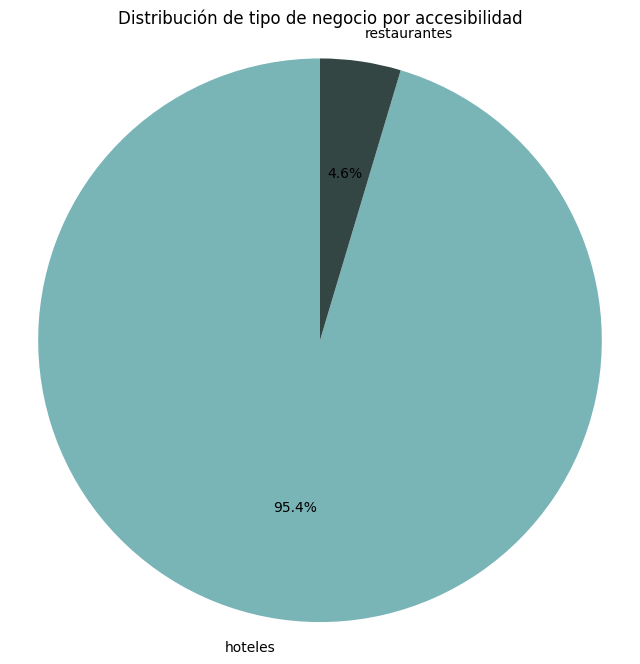

In [138]:
reemplazos = {7: 'hoteles', 14: 'restaurantes'}
accessibility_df['id_category_general'] = accessibility_df['id_category_general'].replace(reemplazos)

# Contar la frecuencia de categorias en accessibility_df
cat_counts = accessibility_df['id_category_general'].value_counts().reset_index()
cat_counts.columns = ['id_category_general', 'frecuencia']

# Crear el gráfico de torta
paleta = ['#79b4b7', '#344643']
fig, ax = plt.subplots(figsize=(8, 8))  # Tamaño del gráfico
ax.pie(cat_counts['frecuencia'], labels=cat_counts['id_category_general'], colors=paleta, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Asegura que el gráfico sea un círculo
plt.title('Distribución negocios por accesibilidad')
plt.show()

In [140]:
cat_counts

,id_category_general,frecuencia
0,hoteles,12689
1,restaurantes,615


# El 95% de las accesibilidades estan dadas en los Hoteles, no en restaurantes